In [3]:
from my_lib_optim import optimization, oracles, plot_trajectory_2d
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd

In [4]:
def func_cond(oracle, x, alpha):
    return (oracle.func_directional(x, x, alpha=alpha) - oracle.func(x)) / oracle.func(x) / (
            np.linalg.norm(alpha * x) / np.linalg.norm(x))

# Задание 1
Эксперимент: Траектория градиентного спуска на квадратичной функции

Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте две-три квадратичные двумерные функции,
на которых работа метода будет отличаться, нарисуйте графики с линиями уровня функций и траекториями методов.
Попробуйте ответить на следующий вопрос: Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная стратегия, Армихо, Вульф)?

Сперва построим две квадратичные функции и посмотрим, как будет вести себя градиентный спуск с выбором шага методом Вульфа

1573337635.9261763
622988652.8639534
980171494.3058078
388114861.59724367
610635718.8132237
241791154.7829469
380419123.85406184
150633145.79264787
236996797.49352777
93842740.57402125
147646315.60356417
58462962.531271
91981979.25819057
36421762.26979233
57303729.34582032
22690344.61138912
35699573.1492332
14135827.222468182
22240428.984059043
8806459.958443072
13855534.891895346
5486324.626010794
8631841.017011337
3417917.987932824
5377539.006923667
2129324.1229017656
3350145.7816467397
1326544.7668372893
2087102.8074059733
826422.3372557135
1300241.366374409
514851.7385836211
810035.6172355823
320746.79104487883
504642.99795340834
199821.611263495
314386.8614722265
124486.59641415493
195859.4473066635
77553.7369996968
122018.21322813435
48315.09813802189
76015.96228389321
30099.75790200913
47357.08193946102
18751.80762689168
29502.924681033972
11682.16337224176
18379.987302550042
7277.855221831428
11450.52352921644
4534.021220399654
7133.546228024171
2824.643772172249
4444.118354731

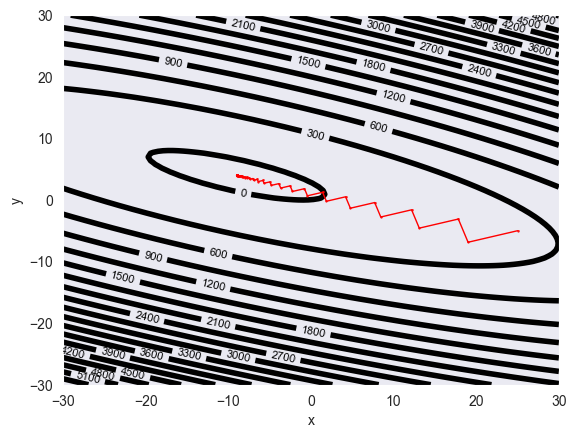

In [3]:
A = np.array([[1.0, 2.0], [2.0, 7.0]])
b = np.array([-1.0, 10.0])
oracle = oracles.QuadraticOracle(A, b)
[x_star, msg, history] = optimization.gradient_descent(oracle, np.array([25, -5]), trace=True, max_iter=1000000,
                                                       tolerance=1e-9)
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history['x'])
plt.show()

In [4]:
print(f'Количество итераций: {len(history["x"])}')

Количество итераций: 89


37847760.24811782
80315036.21868905
14057708.003689177
105993156.3923751
4011603.5710798637
8512844.194586718
1490020.8429533702
11234549.202018518
425202.5246936772
902303.2260607396
157932.01223505475
1190785.3305673848
45068.55769828987
95637.96695321237
16739.71247219189
126215.09577254266
4776.958684493627
10136.969988322275
1774.2949620281922
13377.936385286763
506.3249289253749
1074.449445314023
188.06312339666025
1417.9697035023253
53.666977376997444
113.88428809519696
19.933404049364018
150.29508452187767
5.688332326128932
12.070955153977522
2.1128044130919292
15.930250410712905


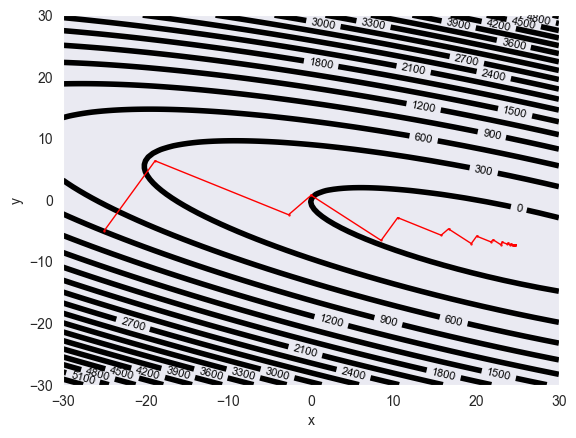

Количество итераций: 34


In [4]:
A = np.array([[1.0, 2.0], [2.0, 7.0]])
b = np.array([10, -2])
oracle = oracles.QuadraticOracle(A, b)
[x_star, msg, history] = optimization.gradient_descent(oracle, np.array([-25, -5]), trace=True, max_iter=1000000,
                                                       tolerance=1e-9)
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history['x'])
plt.show()
print(f'Количество итераций: {len(history["x"])}')

### Теперь взглянем на метод Армихо

2922597864.768682
2374610765.124554
1929371246.6637003
1567614137.9142566
1273686487.0553334
1034870270.7324582
840832094.9701225
683176077.1632246
555080562.69512
451002957.189785
366439902.7167003
297732420.95731896
241907592.0278217
196549918.5226051
159696808.7996166
129753657.14968853
105424846.43412194
85657687.72772405
69596871.27877583
56547457.91400533
45944809.55512934
37330157.763542585
30330753.18287835
24643736.96108866
20023036.28088451
16268716.978218617
13218332.544802582
10739895.1926521
8726164.844029851
7090008.935774266
5760632.260316608
4680513.711507246
3802917.3905996117
3089870.3798621944
2510519.6836380507
2039797.2429559156
1657335.2599016882
1346584.8986701295
1094100.2301694823
888956.4370127171
722277.1050728422
586850.1478716802
476815.74514574127
387412.79293091624
314772.8942563705
255752.97658330327
207799.29347393327
168836.92594756855
137180.00233239637
111458.75189507024
90560.23591474506
73580.19168072943
59783.90574059227
48574.4234142306
39466.719

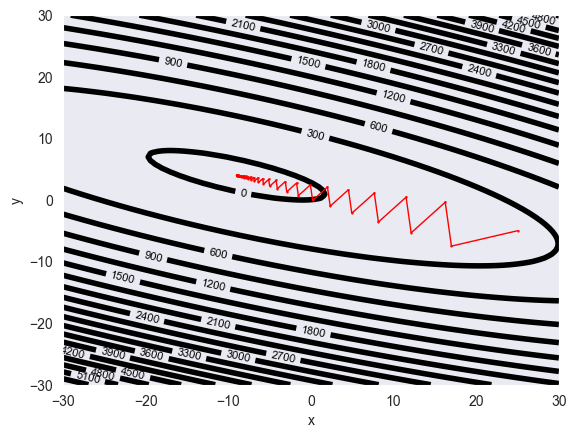

Количество итераций: 107


In [5]:
A = np.array([[1.0, 2.0], [2.0, 7.0]])
b = np.array([-1.0, 10.0])
oracle = oracles.QuadraticOracle(A, b)
[x_star, msg, history] = optimization.gradient_descent(oracle, np.array([25, -5]), trace=True,
                                                       line_search_options={'method': 'Armijo'}, max_iter=1000000,
                                                       tolerance=1e-9)
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history['x'])
plt.show()
print(f'Количество итераций: {len(history["x"])}')

812500000.0000001
660156250.0000002
536376953.1250001
435806274.4140626
354092597.96142584
287700235.84365845
233756441.62297255
189927108.8186652
154315775.91516545
125381567.93107194
101872523.94399595
82771425.70449671
67251783.38490358
54642074.00023414
44396685.12519025
36072306.664217085
29308749.164676376
23813358.69629956
19348353.940743387
15720537.576854007
12772936.781193877
10378011.134720024
8432134.046960022
6851108.913155013
5566525.9919384355
4522802.36844998
3674776.9243656085
2985756.2510470506
2425926.9539757343
1971065.6501052887
1601490.840710555
1301211.3080773305
1057234.1878128333
859002.7775979307
697939.7567983179
567076.0523986339
460749.2925738911
374358.8002162849
304166.5251757327
247135.30170528384
200797.43263554265
163147.91401637753
132557.68013830588
107703.1151123724
87508.78102880224
71100.88458590112
57769.468726044644
46937.69333991135
38136.875838677945
30986.211618926565
25176.296940378197
20455.741264057582
16620.2897770471
13503.985443850766
1

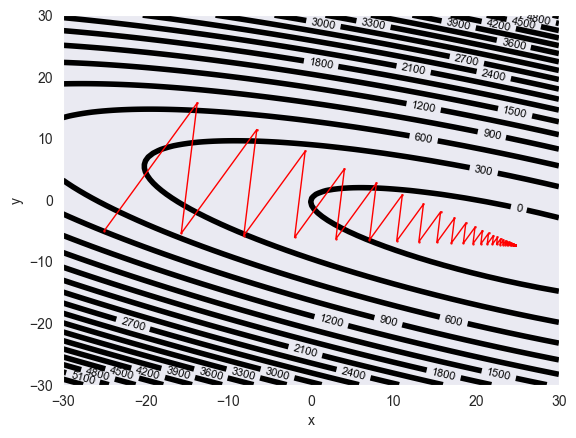

Количество итераций: 101


In [6]:
A = np.array([[1.0, 2.0], [2.0, 7.0]])
b = np.array([10, -2])
oracle = oracles.QuadraticOracle(A, b)
[x_star, msg, history] = optimization.gradient_descent(oracle, np.array([-25, -5]), trace=True,
                                                       line_search_options={'method': 'Armijo'}, max_iter=1000000,
                                                       tolerance=1e-9)
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history['x'])
plt.show()
print(f'Количество итераций: {len(history["x"])}')

### А теперь и постоянный шаг

666192170.818505
515735231.31672585
424132782.9181493
356203319.57295364
301227524.73736656
255305582.87624192
216539431.12190175
183701756.5618438
155855282.41877884
132233031.59718353
112191938.31955892
95188480.43791491
80762075.50163831
68522098.66893929
58137168.31363457
49326136.9779471
41850469.835839346
35507784.256421044
30126370.117014196
25560541.038376484
21686690.28802159
18399944.467342254
15611324.361063138
13245336.07911507
11237927.275819916
9534753.11629021
8089705.045896119
6863662.533410386
5823433.994845173
4940858.226528835
4192042.02129997
3556713.3284637234
3017672.446171852
2560326.3888344388
2172293.823896575
1843069.8827767058
1563741.771684144
1326747.4832944842
1125671.0770937984
955068.9861940042
810322.6483748725
687513.4717607596
583316.7501864809
494911.6563151793
419904.8758300361
356265.8153146239
302271.629761137
256460.58148398393
217592.46776509745
184615.04592299808
156635.5468606795
132896.50590330316
112755.25661499903
95666.53244867802
81167.70

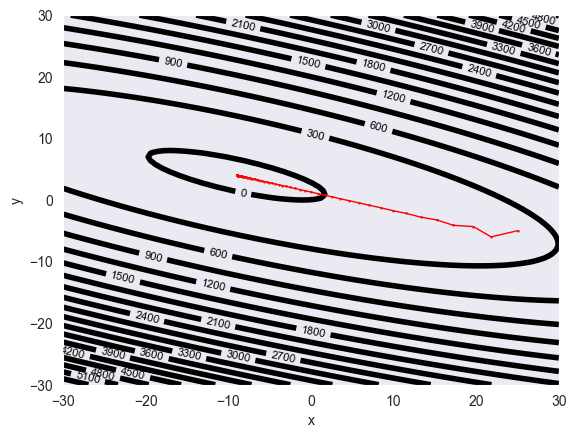

Количество итераций: 125


In [7]:
A = np.array([[1.0, 2.0], [2.0, 7.0]])
b = np.array([-1.0, 10.0])
oracle = oracles.QuadraticOracle(A, b)
[x_star, msg, history] = optimization.gradient_descent(oracle, np.array([25, -5]), trace=True,
                                                       line_search_options={'method': 'Constant', 'c': 0.2},
                                                       max_iter=1000000, tolerance=1e-9)
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history['x'])
plt.show()
print(f'Количество итераций: {len(history["x"])}')

294960735.9210234
99956024.231546
43991793.58312773
26240940.830154832
19254144.488220785
15518729.059539607
12944821.656598289
10922685.080072159
9250920.380000573
7844444.183152018
6654365.4295781255
5645529.341329276
4789827.067313991
4063876.355149402
3447965.361458188
2925404.0926067475
2482041.364439592
2105873.225235747
1786715.6818971562
1515928.3726304981
1286180.484237053
1091252.2452914326
925866.5311581875
785545.9975820236
666491.8685130206
565481.0948916848
479779.09977328655
407065.7474830375
345372.5325932359
293029.28828433284
248618.97136897105
210939.2999125369
178970.20489863108
151846.21478661793
128833.02535236807
109307.62050781507
92741.40592756735
78685.89887387474
66760.58681302823
56642.62613005101
48058.10206393516
40774.6132512436
34594.9801258624
29351.906847879283
24903.45224862599
21129.187180709778
17926.9342443114
15210.001627193236
12904.836172567098
10949.032138369907
9289.641740814866
7881.741745032175
6687.217297352244
5673.730074979138
4813.842818

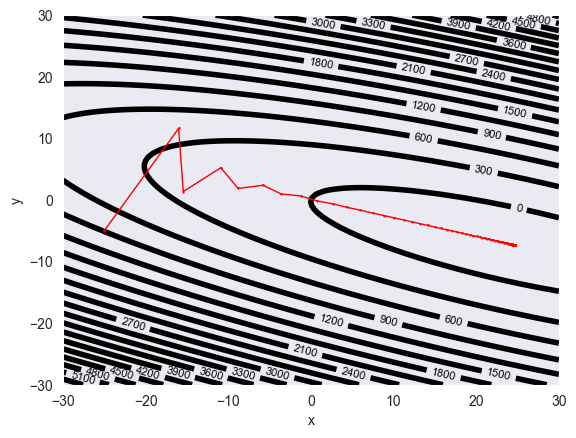

Количество итераций: 108


In [8]:
A = np.array([[1.0, 2.0], [2.0, 7.0]])
b = np.array([10, -2])
oracle = oracles.QuadraticOracle(A, b)
[x_star, msg, history] = optimization.gradient_descent(oracle, np.array([-25, -5]), trace=True,
                                                       line_search_options={'method': 'Constant', 'c': 0.2},
                                                       max_iter=1000000, tolerance=1e-9)
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history['x'])
plt.show()
print(f'Количество итераций: {len(history["x"])}')

Можно сделать вывод, что метод Армихо работает быстрее чем метод Вульфа для такого класса функций, а метод с постоянным шагом работает медленнее и начинает расходиться при слишком большом значении параметра $\alpha$. То есть любой из методов с адаптивным шагом будет лучше для оптимизации квадратичной функции методом градиентного спуска.

Исследуя форму траектории, можно увидеть что метод Вульфа не имеет больших скачков по сравнению с методом Армихо.

Теперь о выборе начальной точки: не трудно заметить, что чем лучше мы выберем начальное условие, тем быстрее сойдется наш алгоритм. 

# Задание 2

Эксперимент: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от следующих двух параметров: 
1) числа обусловленности κ ≥ 1 оптимизируемой функции 
2) размерности пространства n оптимизируемых переменных.

Для этого для заданных параметров n и κ сгенерируйте случайным образом квадратичную задачу размера n с числом обусловленности κ и запустите на ней градиентный спуск с некоторой фиксированной требуемой точностью. Замерьте число итераций T(n, κ), которое потребовалось сделать методу до сходимости (успешному выходу по критерию остановки).

In [23]:
def create_matrix(size: int, condition_number: int):
    vec = np.concatenate(
        (np.array([1]), np.random.randint(1, condition_number + 1, size=size - 2), np.array([condition_number])))
    return scipy.sparse.diags(vec, 0) / condition_number


def create_grid(max_k: int, shape: tuple, n_reps: int):
    n_range = 2 ** np.arange(2, 2 * (shape[0]) + 1, step=2)
    k_range = np.repeat(np.linspace(10, max_k, num=shape[1], dtype=int), n_reps)
    return np.array([[(n, k) for k in k_range] for n in n_range])


def return_n_iter(value, i: int, j: int, line_search_options):
    A = create_matrix(*value)
    b = np.random.randn(value[0])

    local_oracle = oracles.QuadraticOracle(A, b)
    [_, msg, history] = optimization.gradient_descent(local_oracle, 1 + np.random.randn(value[0]), trace=True,
                                                      line_search_options=line_search_options,
                                                      max_iter=10000, tolerance=1e-9)
    if msg == 'success':
        return i, j, len(history['x'])
    else:
        return i, j, -1


def my_gen(grid, i_size, j_size, line_search_options=None):
    if line_search_options is None:
        line_search_options = {'method': 'Constant', 'c': 1.05}

    for i in range(i_size):
        for j in range(j_size):
            yield grid[i, j], i, j, line_search_options


In [31]:
from joblib import Parallel, delayed

grid_size = (5, 100)
num_reps = 10

values_matrix = np.zeros((grid_size[0], grid_size[1] * num_reps))
my_grid = create_grid(1000, grid_size, num_reps)

In [32]:
gen = my_gen(my_grid, grid_size[0], grid_size[1] * num_reps)

result = Parallel(n_jobs=8, verbose=10)(delayed(return_n_iter)(*x) for x in gen)

for i, j, v in result:
    values_matrix[i, j] = v

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.18657344313773694s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.023000240325927734s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  50 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.08703899383544922s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done 124 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 216 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 336 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 45

Text(0.5, 1.0, 'Gradient descent with $\\alpha$ = 1.05')

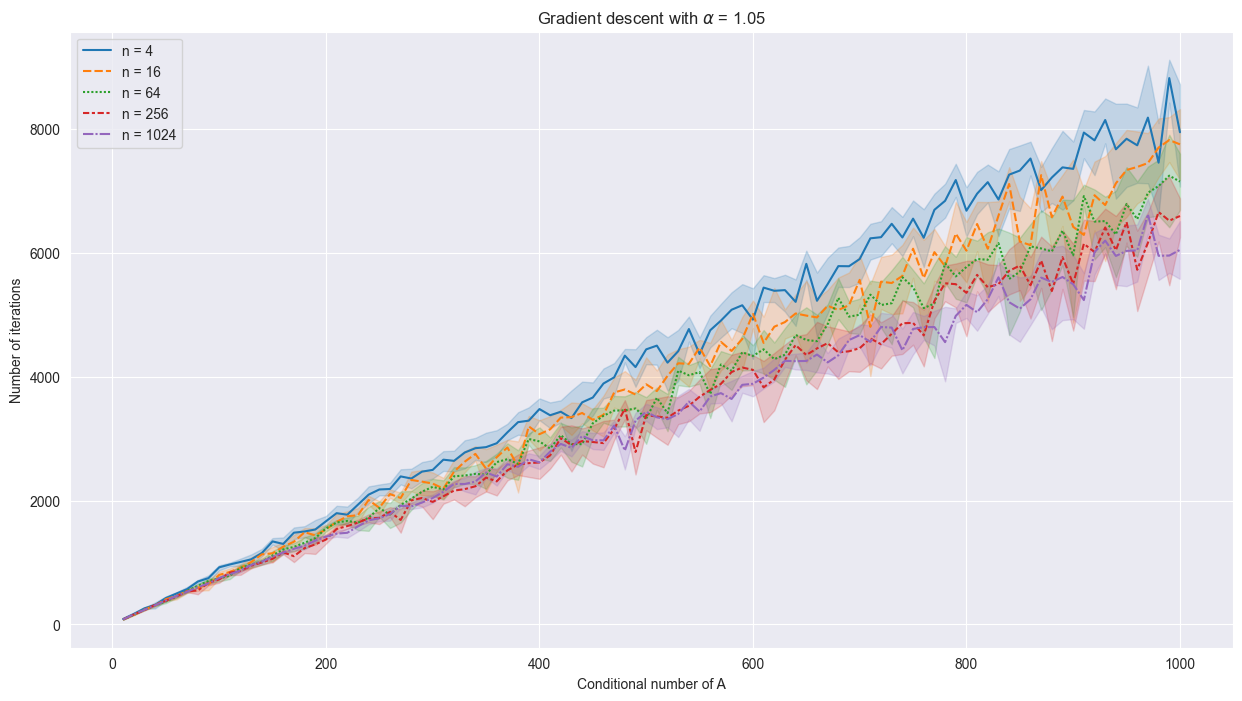

In [33]:
data = pd.DataFrame(values_matrix.T, columns=[f'n = {n}' for n in my_grid[:, 1, 0]],
                    index=[n for n in my_grid[-1, :, -1]])
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data)
ax.set(xlabel='Conditional number of A', ylabel='Number of iterations')
plt.title(r"Gradient descent with $\alpha$ = 1.05")

Теперь повторим для метода Вульфа:

In [34]:
gen = my_gen(my_grid, grid_size[0], grid_size[1] * num_reps, line_search_options={'method': 'Wolfe'})
result = Parallel(n_jobs=8)(delayed(return_n_iter)(*x) for x in gen)

for i, j, v in result:
    values_matrix[i, j] = v

Text(0.5, 1.0, 'Gradient descent with Wolfe linear search')

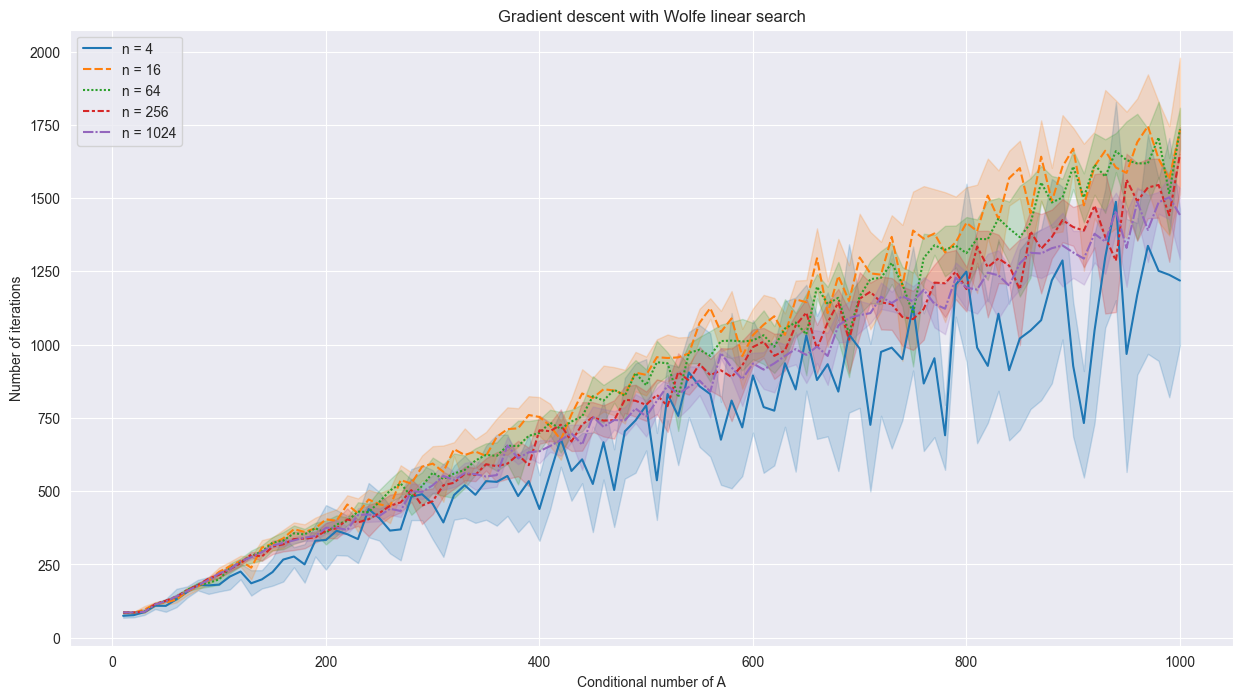

In [35]:
data = pd.DataFrame(values_matrix.T, columns=[f'n = {n}' for n in my_grid[:, 1, 0]],
                    index=[n for n in my_grid[-1, :, -1]])
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data)
ax.set(xlabel='Conditional number of A', ylabel='Number of iterations')
plt.title(r"Gradient descent with Wolfe linear search")

И для метода Армихо:

In [36]:
# Set up a list of processes that we want to run
gen = my_gen(my_grid, grid_size[0], grid_size[1] * num_reps, line_search_options={'method': 'Armijo'})
# processes = [mp.Process(target=return_n_iter, args=(values_matrix, *x)) for x in gen]
result = Parallel(n_jobs=8)(delayed(return_n_iter)(*x) for x in gen)

for i, j, v in result:
    values_matrix[i, j] = v

Text(0.5, 1.0, 'Gradient descent with Armijo linear search')

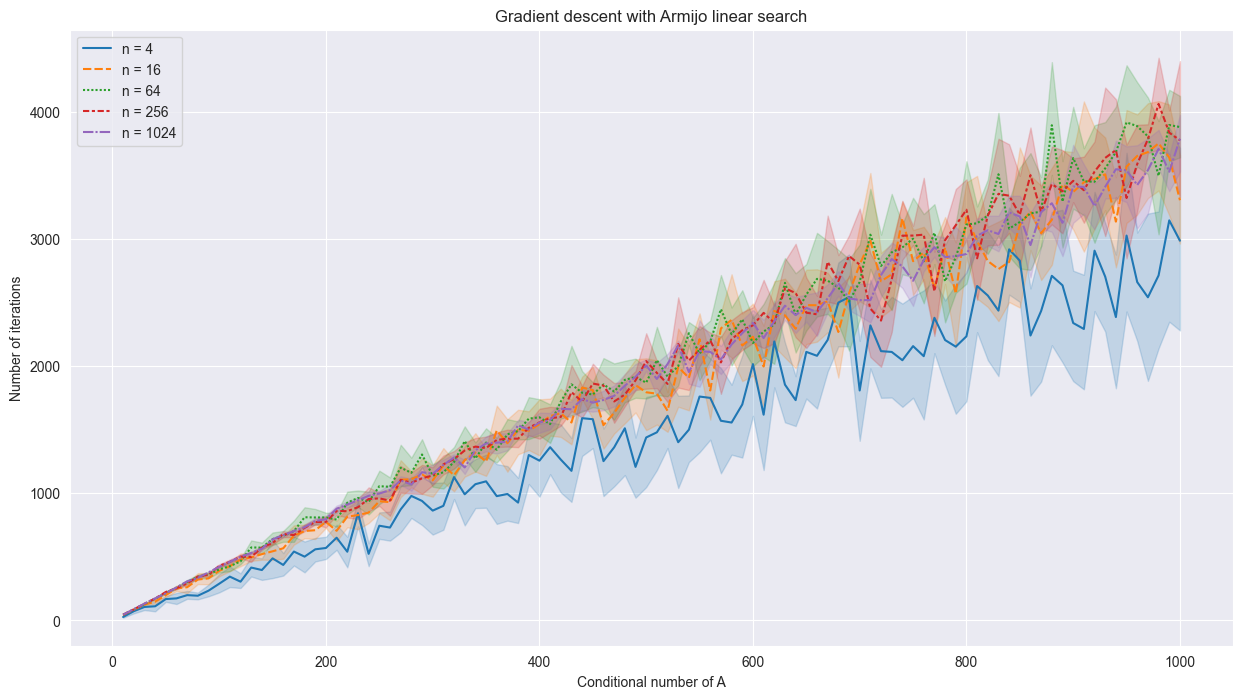

In [37]:
data = pd.DataFrame(values_matrix.T, columns=[f'n = {n}' for n in my_grid[:, 1, 0]],
                    index=[n for n in my_grid[-1, :, -1]])
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data)
ax.set(xlabel='Conditional number of A', ylabel='Number of iterations')
plt.title(r"Gradient descent with Armijo linear search")

Реальные датасеты

In [26]:
from sklearn.datasets import load_svmlight_file

dataset_w8a = load_svmlight_file(r'datasets/w8a.txt')
dataset_gisette = load_svmlight_file(r'datasets/gisette_scale')
dataset_real_sim = load_svmlight_file(r'datasets/real-sim')

In [27]:
def fun_for_plot(dataset, name: str, strat: str):
    X, y = dataset[0], dataset[1]
    reg_coeff = 1 / y.shape[0]
    x_0 = np.zeros(X.shape[1])
    oracle = oracles.create_log_reg_oracle(X, y, regcoef=reg_coeff)
    X, msg, history = optimization.gradient_descent(oracle, trace=True, x_0=x_0,
                                                    line_search_options={'method': strat, 'c': 1}, max_iter=10 ** 10)
    X_neut, msg_neut, history_neut = optimization.newton(oracle, trace=True, x_0=x_0, tolerance=1e-9,
                                                         line_search_options={'method': strat, 'c': 1},
                                                         max_iter=10 ** 10)

    data_for_graph = pd.DataFrame([history['time'], history_neut['time'], history['func'], history_neut['func'],
                                   np.array(history['grad_norm'] / history['grad_norm'][0]) ** 2,
                                   np.array(history_neut['grad_norm'] / history_neut['grad_norm'][0]) ** 2])
    data_for_graph = data_for_graph.T
    data_for_graph.columns = ['time_grad', 'time_neut', 'func_grad', 'func_neut', 'norm_grad', 'norm_neut']

    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    sns.lineplot(data=data_for_graph, x='time_grad', y='func_grad', label='Gradient descent', ax=axis[0])
    sns.lineplot(data=data_for_graph, x='time_neut', y='func_neut', label='Newton', ax=axis[0])
    axis[0].set(xlabel='Time, s', ylabel='Function value')

    sns.lineplot(data=data_for_graph, x='time_grad', y='norm_grad', label='Gradient descent', ax=axis[1])
    sns.lineplot(data=data_for_graph, x='time_neut', y='norm_neut', label='Newton', ax=axis[1])

    axis[1].set(xlabel='Time, s', ylabel='Relative gradient norm')
    plt.yscale('log')

    fig.suptitle(f'{name} dataset, {strat} strategy')
    plt.show()

    return data_for_graph

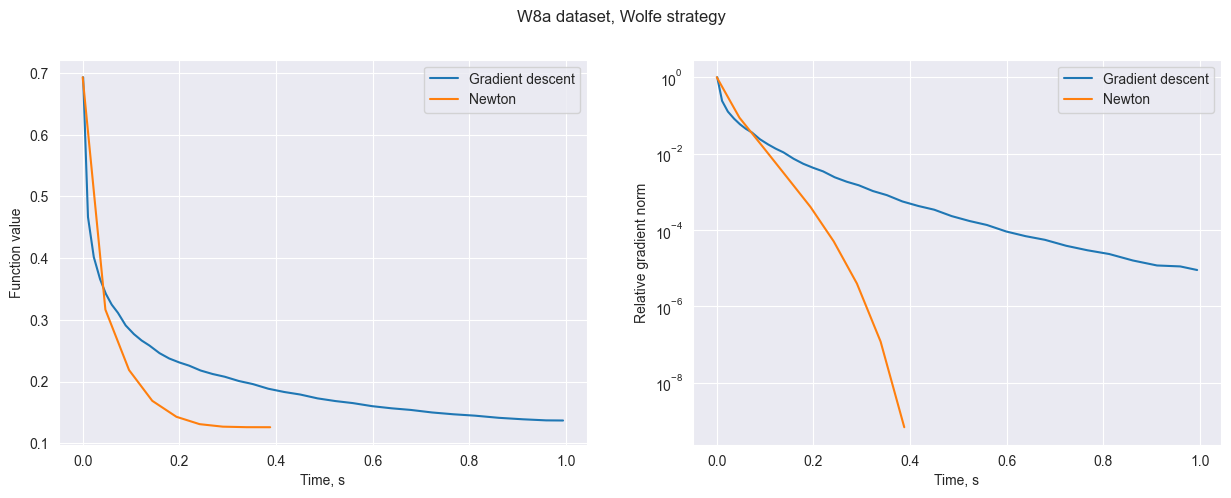

In [137]:
w8a_data_wolfe = fun_for_plot(dataset_w8a, 'W8a', strat='Wolfe')

24027.11029171305
6943.696802752089
2222.569950089686
704.3364688732911
233.91726173586002
93.65055334534459
44.56904115731181
18.80655028800541
7.780247223456346
11.156280050125883
14.595401846146915
31.914242954997956
7.3417141182104615
17.206828246598633
4.056743770428031
8.672594139112828
2.357331151968987
4.37152341213846
6.8890696045646305
14.03210131007205
2.490910973719176
5.098890581574641
1.2309598991695394
2.0716065072229126
3.333027825125653
6.665389071045346
1.1651590141600188
2.1198382439065373
3.3589799070764443
6.377112851203745
10502248.434367748
442546.66386100376
8414.454031834035
4123.667240282861
3651.827743895441
50.13452201267193
44.00073194657034


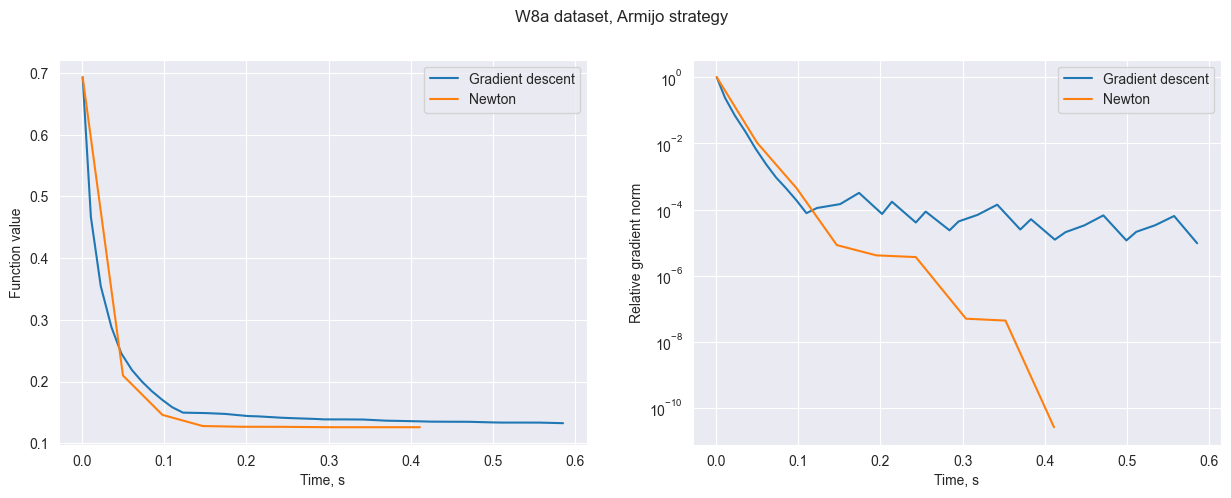

In [28]:
w8a_data_arm = fun_for_plot(dataset_w8a, 'W8a', strat='Armijo')

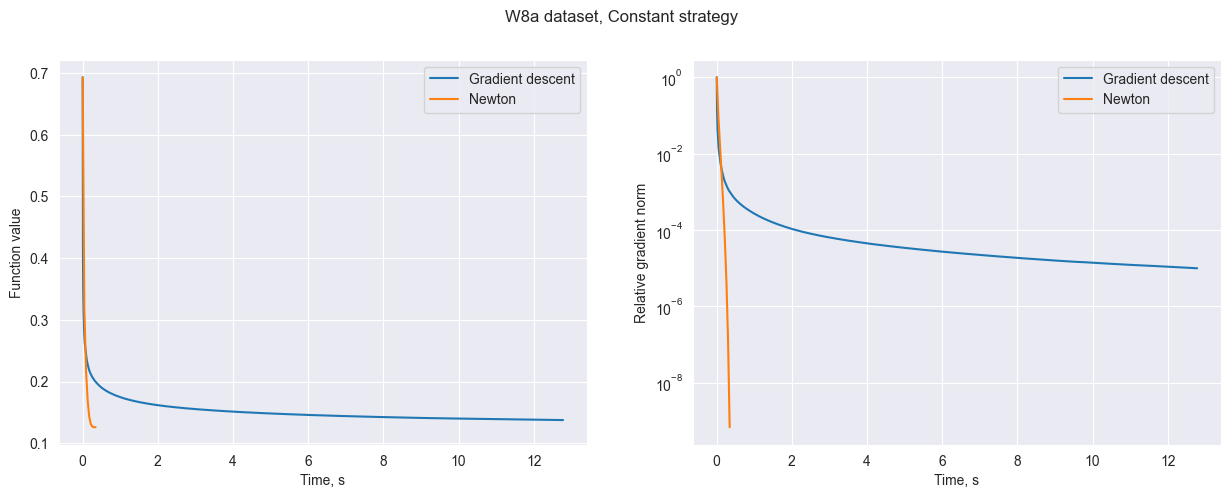

In [139]:
w8a_data_const = fun_for_plot(dataset_w8a, 'W8a', strat='Constant')

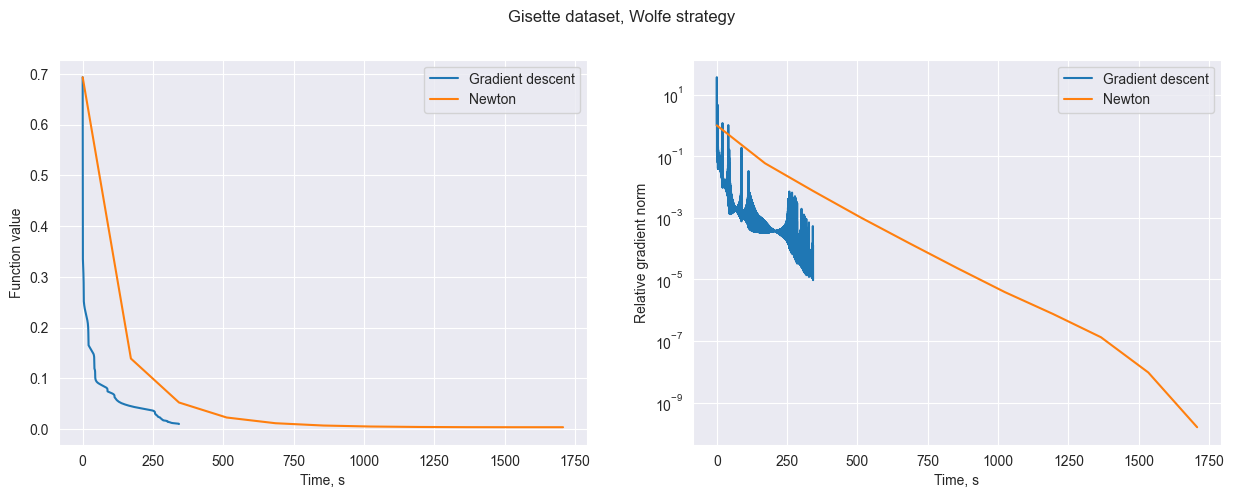

In [143]:
gis_data_wolfe = fun_for_plot(dataset_gisette, 'Gisette', strat='Wolfe')

3981848.0163535215
1787841.3158711784
1099958.8688073896
630188.5100387759
396329.3002293644
237097.66532874442
149082.41055500752
91291.0124599516
58083.31615531535
37048.35876935438
24788.453990288013
17235.85369726705
12802.849114240682
43663.392472095045
27332.073653571504
17765.86962442426
12463.012977962591
44720.58585442724
26544.491285837415
16447.652670672665
11146.986708889757
39008.66885341271
22283.725859714712
13498.225920136674
9118.456411497393
28879.52956873812
16244.19906963968
9980.502407890672
34215.75934439951
17732.109986408395
10316.866881065213
37466.45350843426
18709.898477448518
10210.526261692787
6554.066521604388
17929.765960105884
9564.853768870544
6001.360378808452
15575.613643674378
8154.561764882694
26664.70580875045
12034.144345034323
6553.894447087452
19393.04792730198
9055.71650567487
5187.781892236629
12970.759526249592
6370.514523080316
18698.74827826214
8054.195964039863
4535.856121186622
10649.66366487162
5241.682969853078
14050.237755478505
6146.6

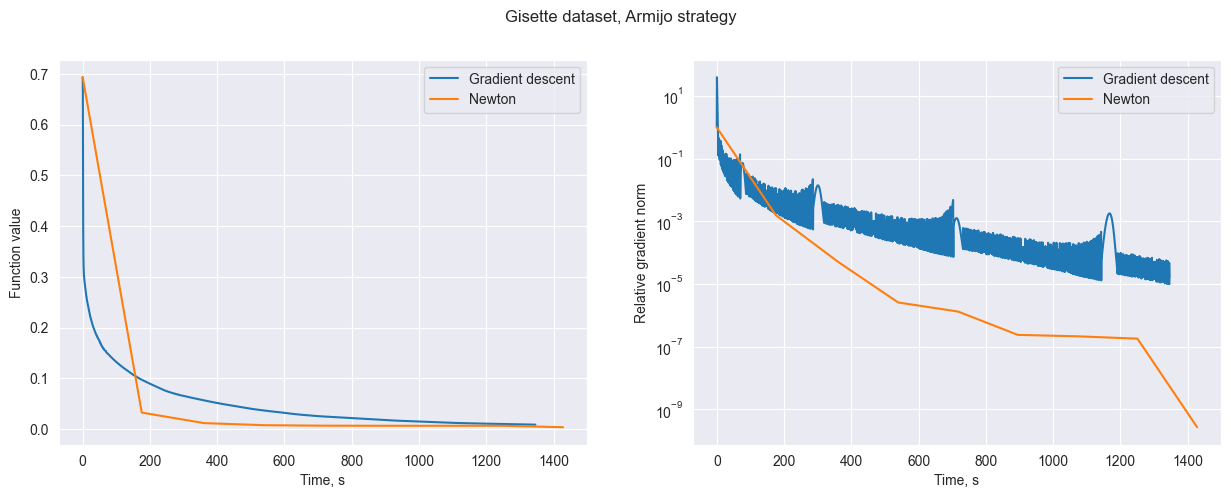

In [31]:
gis_data_arm = fun_for_plot(dataset_gisette, 'Gisette', strat='Armijo')

5245596.297862537
13239410.886630798
12710082.496445948
13239256.044051241
12710104.093061231
13239101.275281241
12710125.704670502
13238946.58028139
12710147.331253981
13238791.959012322
12710168.97279188
13238637.41143468
12703322.76694124
13238481.868506825
12675647.115096126
13238322.038987113
12617180.997356793
13238152.969018664
12478650.562529422
13230110.289271688
12390888.06959433
13120987.283970695
12265632.742234284
12546185.20055706
12029466.24037669
11218115.885661088
11479785.950476266
10805269.992866348
10958285.197310217
10281333.493530558
10221292.491744412
9157828.075695138
9151401.27606765
8440115.930884248
8271842.330690134
7379755.911183245
7017264.58989489
5858338.316913014
5341395.770707095
4231888.174266929
3706543.735316898
2621431.5376030467
2040950.5843437063
1275676.5443536201
731328.4666571554
287699.71802029875
125948.28777194046
54030.74075484902
22256.13159404546
13959.530046969612
9782.958906674938
7270.59688464682
5971.373320924058
5252.465288996382
48

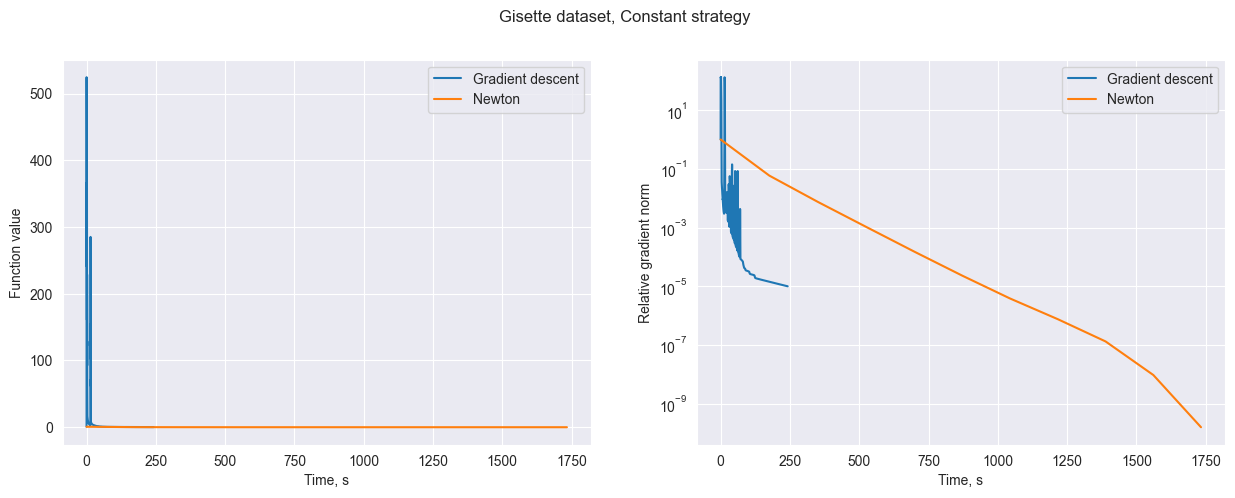

In [30]:
gis_data_const = fun_for_plot(dataset_gisette, 'Gisette', strat='Constant')

C:\Users\kudre\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
E:\HSE_Optim\Lab 1\my_lib_optim\optimization.py:102: LineSearchWarning: The line search algorithm did not converge
  alpha = scipy.optimize.line_search(f=oracle.func, myfprime=oracle.grad, xk=x_k, pk=d_k, c1=self.c1,


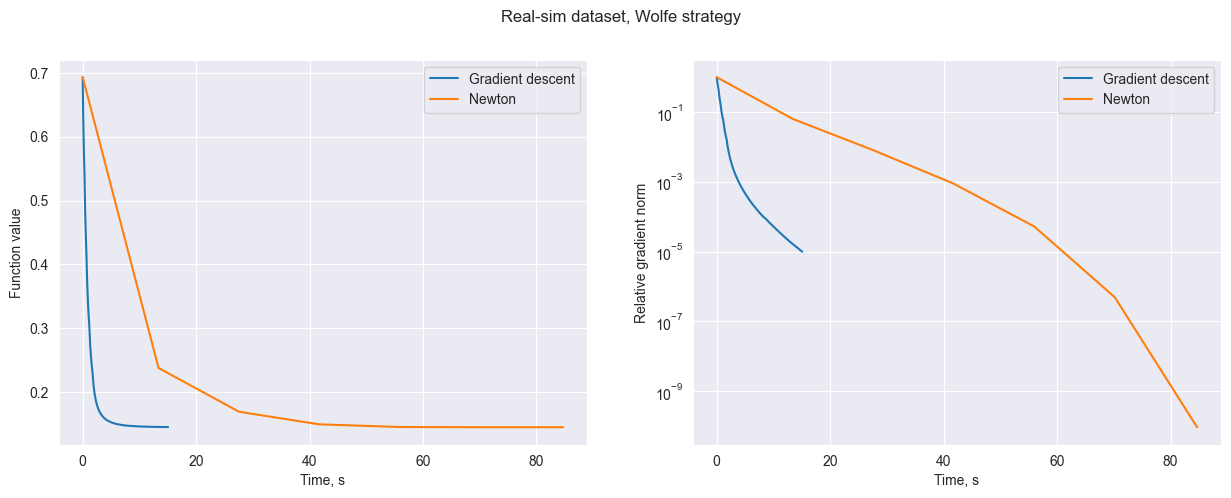

In [140]:
real_sim_wolfe = fun_for_plot(dataset_real_sim, 'Real-sim', strat='Wolfe')

99537.71056010373
98619.60398554524
96809.19875172793
93290.87894968336
86656.93540088739
74923.9021878857
56815.288019875334
35458.47574176018
18528.34759376053
8298.69546446687
3119.0019401080745
1065.704069863095
331.51453194343947
331.98590384270483
515.8573537707484
53.38816031069866
46.779588468663775
187.07010270057432
228.54310786806982
271.55019587474123
9.741214161661679
7.8279966821233495
10.743182286224545
10.392795436387589
10.258799829902438
10.229848757034537
10.27343979606904
10.359496053593448
10.473803074288453
10.602082908187173
10.736656152264485
10.87013571637547
10.998891335916964
11.119179825887354
11.229716085344963
11.328782821146365
11.416355674697233
11.491845943459188
11.555848026573052
11.608384994110466
11.650305488887195
11.681944736776087
11.704206896488342
11.717567396592722
11.722883916632018
11.720675708371894
11.71170725915517
11.696489850464305
11.67567879172368
11.649751627361344
11.619254844300913
11.584621396464367
11.546297336504628
11.504668463

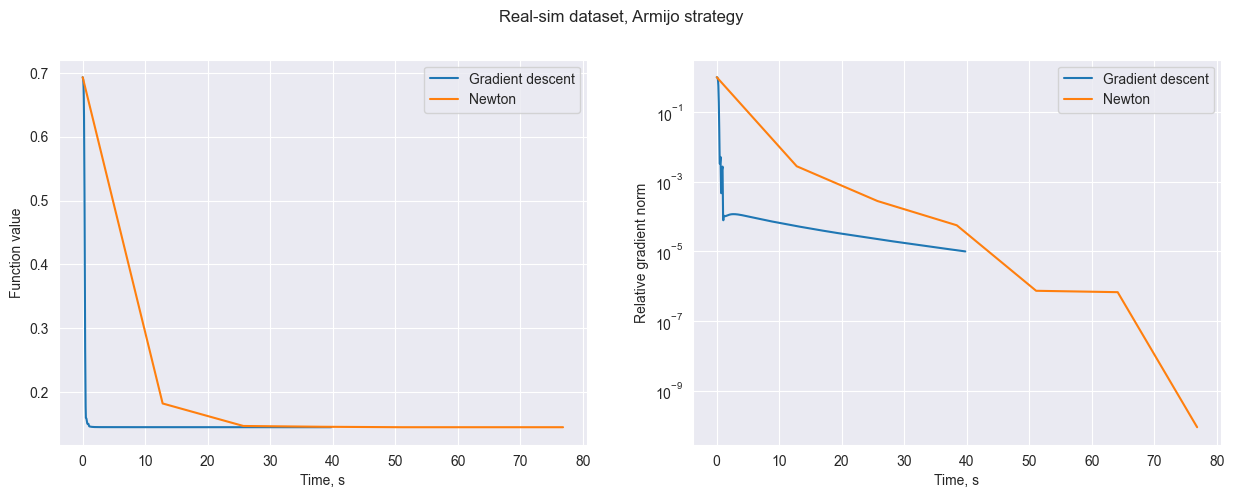

In [29]:
real_sim_arm = fun_for_plot(dataset_real_sim, 'Real-sim', strat='Armijo')

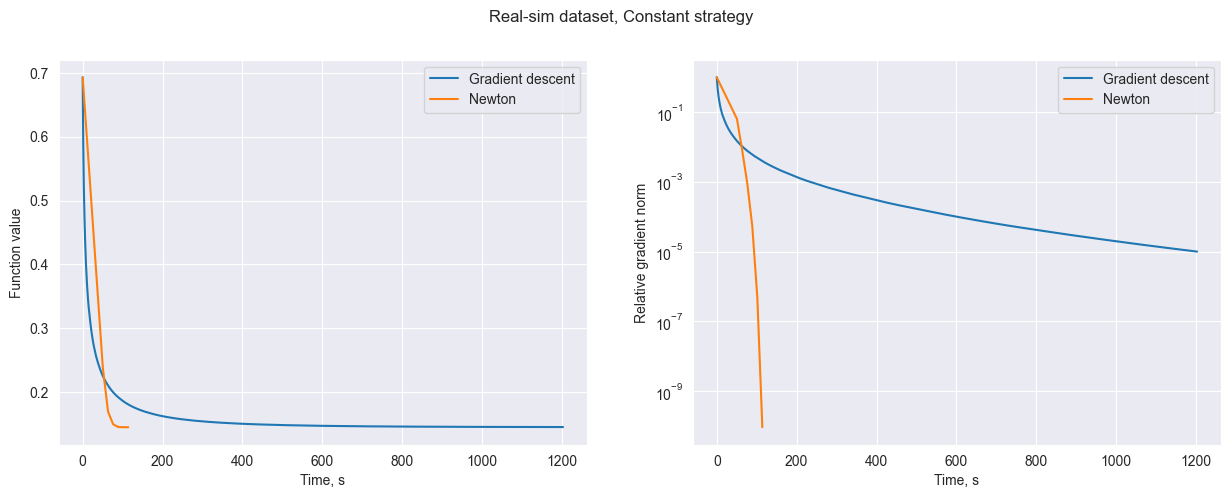

In [142]:
real_sim_const = fun_for_plot(dataset_real_sim, 'Real-sim', strat='Constant')

# Задание 4

Исследовать, как зависит поведение метода от стратегии подбора шага: константный шаг (попробовать различные значения), бэктрэкинг (попробовать различные константы c ), условия Вульфа (попробовать различные параметры c2).

Рассмотрите квадратичную функцию и логистическую регрессию с модельными данным (сгенерированными случайно).

In [351]:
n = 2000
A = np.random.randn(n, n)
A = (A + A.T) / 2 + np.diag(np.random.randint(1, 10, size=n)) * 40
b = np.random.randn(n)

oracle = oracles.QuadraticOracle(A, b)

In [352]:
b = b.reshape(-1, 1)
f_min = -b.T @ np.linalg.inv(A) @ b / 2
f_min

array([[-15.6651533]])

In [465]:
def check_constants_gd(oracle_name, x_0: np.ndarray, method: str, const_name: str, value: float, grad_flag=False,
                       tol=1e-16):
    x_min, msg, history = optimization.gradient_descent(oracle_name, tolerance=tol,
                                                        line_search_options={'method': method, const_name: value},
                                                        x_0=x_0, trace=True)
    if not grad_flag:
        return np.squeeze(np.array([(abs((x - f_min) / f_min)) for x in history['func']]))
    else:
        return np.squeeze(np.array(history['grad_norm'] / history['grad_norm'][0]) ** 2)


Text(0.5, 1.0, 'Gradient descent with Wolfe linear search')

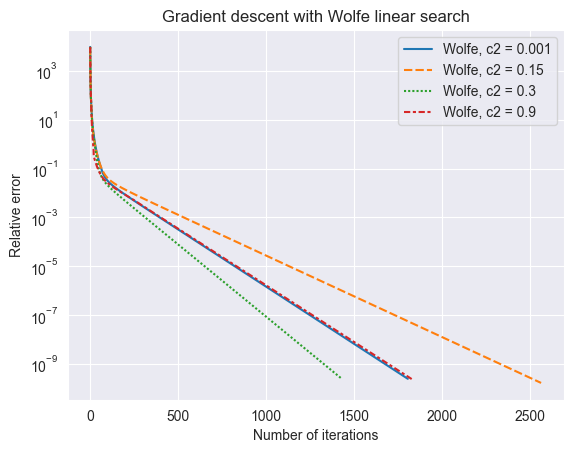

In [388]:
from joblib import Parallel, delayed

const = [0.001, 0.15, 0.3, 0.9]
result = Parallel(n_jobs=8)(delayed(check_constants_gd)(oracle, np.ones(n), 'Wolfe', 'c2', x) for x in const)
result = pd.DataFrame(result)
result = result.T
result.columns = [f'Wolfe, c2 = {x}' for x in const]
ax = sns.lineplot(data=result)
plt.yscale('log')
ax.set(xlabel='Number of iterations', ylabel='Relative error')
plt.title(r"Gradient descent with Wolfe linear search")

Text(0.5, 1.0, 'Gradient descent with Armijo linear search')

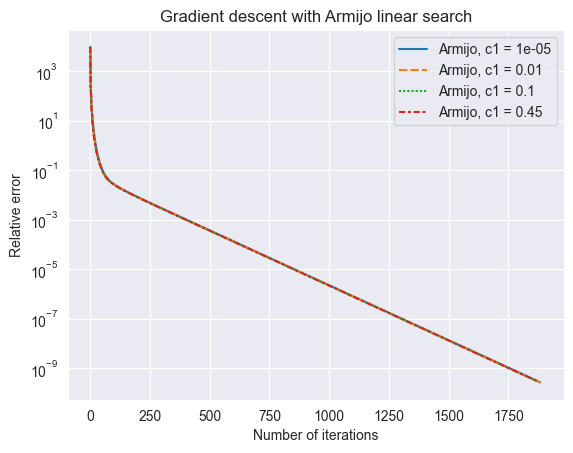

In [473]:
const = [0.00001, 0.01, 0.1, 0.45]
result = Parallel(n_jobs=8)(delayed(check_constants_gd)(oracle, np.ones(n), 'Armijo', 'c1', x) for x in const)
result = pd.DataFrame(result)
result = result.T
result.columns = [f'Armijo, c1 = {x}' for x in const]
ax = sns.lineplot(data=result)
plt.yscale('log')
ax.set(xlabel='Number of iterations', ylabel='Relative error')
plt.title(r"Gradient descent with Armijo linear search")

Text(0.5, 1.0, 'Gradient descent with Constant strategy')

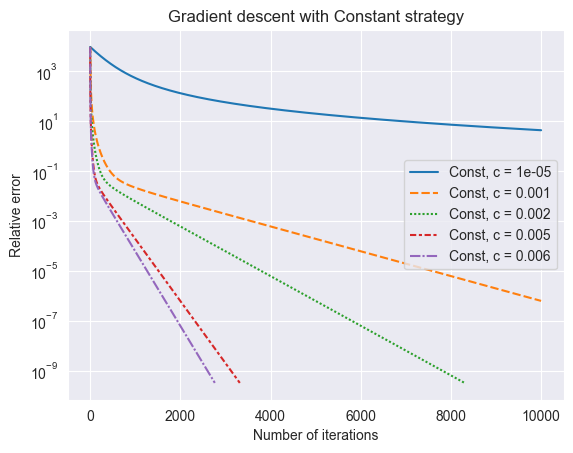

In [599]:
const = [1e-5, 1e-3, 2e-3, 5e-3, 6e-3]
result = Parallel(n_jobs=8)(delayed(check_constants_gd)(oracle, np.ones(n), 'Constant', 'c', x) for x in const)
result = pd.DataFrame(result)
result = result.T
result.columns = [f'Const, c = {x}' for x in const]
ax = sns.lineplot(data=result)
plt.yscale('log')
ax.set(xlabel='Number of iterations', ylabel='Relative error')
plt.title(r"Gradient descent with Constant strategy")

In [574]:
n, m = 100, 2000
A = scipy.sparse.rand(m, n, density=0.8)
b = np.random.choice([-1, 1], size=(m, 1), replace=True)
x_0 = np.random.randn(n)
oracle_reg = oracles.create_log_reg_oracle(A, b, regcoef=1 / m)

Text(0.5, 1.0, 'Gradient descent with Wolfe linear search')

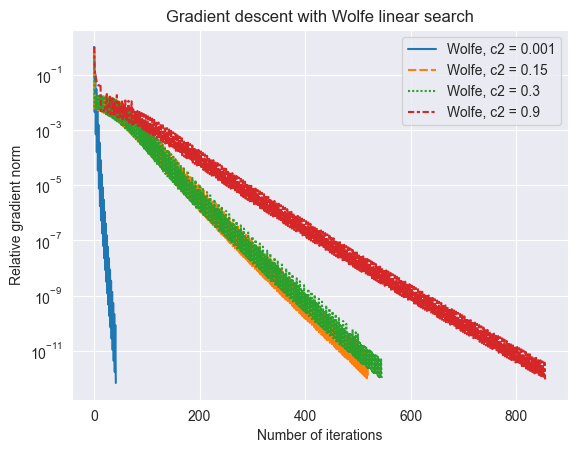

In [575]:
const = [0.001, 0.15, 0.3, 0.9]
result = Parallel(n_jobs=8)(
    delayed(check_constants_gd)(oracle_reg, x_0, 'Wolfe', 'c2', x, 1, 1e-12) for x in const)
result = pd.DataFrame(result)
result = result.T
result.columns = [f'Wolfe, c2 = {x}' for x in const]
ax = sns.lineplot(data=result)
plt.yscale('log')
ax.set(xlabel='Number of iterations', ylabel='Relative gradient norm')
plt.title(r"Gradient descent with Wolfe linear search")

Text(0.5, 1.0, 'Gradient descent with Armijo linear search')

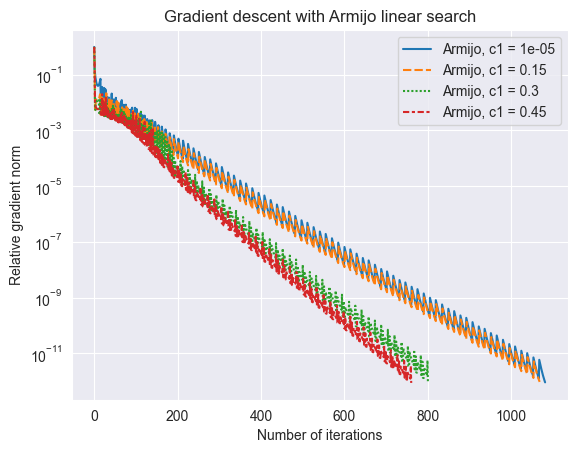

In [576]:
const = [0.00001, 0.15, 0.3, 0.45]
result = Parallel(n_jobs=8)(
    delayed(check_constants_gd)(oracle_reg, x_0, 'Armijo', 'c1', x, 1, 1e-12) for x in const)
result = pd.DataFrame(result)
result = result.T
result.columns = [f'Armijo, c1 = {x}' for x in const]
ax = sns.lineplot(data=result)
plt.yscale('log')
ax.set(xlabel='Number of iterations', ylabel='Relative gradient norm')
plt.title(r"Gradient descent with Armijo linear search")

Text(0.5, 1.0, 'Gradient descent with Constant strategy')

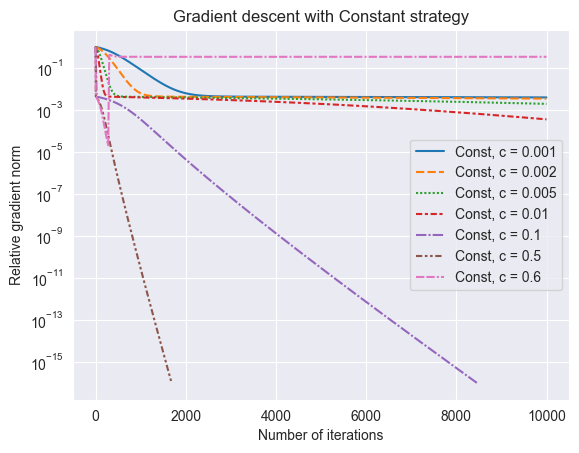

In [601]:
const = [1e-3, 2e-3, 5e-3, 1e-2, 0.1, 0.5, 0.6]
result = Parallel(n_jobs=8)(
    delayed(check_constants_gd)(oracle_reg, x_0, 'Constant', 'c', x, 1e-12) for x in const)
result = pd.DataFrame(result)
result = result.T
result.columns = [f'Const, c = {x}' for x in const]
ax = sns.lineplot(data=result)
plt.yscale('log')
ax.set(xlabel='Number of iterations', ylabel='Relative gradient norm')
plt.title(r"Gradient descent with Constant strategy")

# Задание 5

То же самое, только для метода Ньютона и LogReg loss

In [578]:
def check_constants_newton(oracle_name, x_0: np.ndarray, method: str, const_name: str, value: float, tol=1e-16):
    x_min, msg, history = optimization.newton(oracle_name, tolerance=tol,
                                              line_search_options={'method': method, const_name: value},
                                              x_0=x_0, trace=True, max_iter=100)
    return np.squeeze(np.array(history['grad_norm'] / history['grad_norm'][0]) ** 2)

Text(0.5, 1.0, 'Newton method descent with Wolfe linear search')

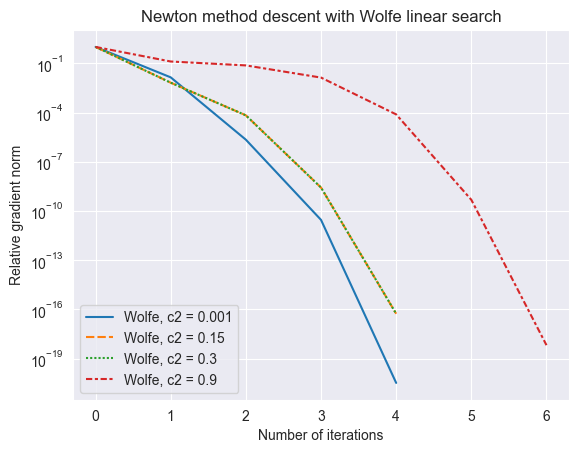

In [579]:
const = [0.001, 0.15, 0.3, 0.9]
result = Parallel(n_jobs=8)(
    delayed(check_constants_newton)(oracle_reg, x_0, 'Wolfe', 'c2', x) for x in const)
result = pd.DataFrame(result)
result = result.T
result.columns = [f'Wolfe, c2 = {x}' for x in const]
ax = sns.lineplot(data=result)
plt.yscale('log')
ax.set(xlabel='Number of iterations', ylabel='Relative gradient norm')
plt.title(r"Newton method with Wolfe linear search")

Text(0.5, 1.0, 'Newton method with Armijo linear search')

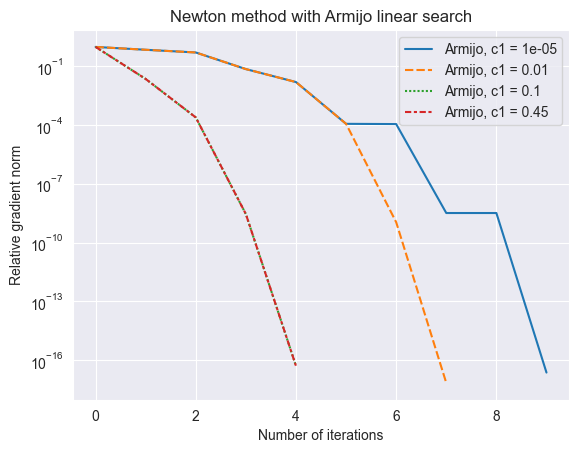

In [590]:
const = [0.00001, 0.01, 0.1, 0.45]
result = Parallel(n_jobs=8)(
    delayed(check_constants_newton)(oracle_reg, x_0, 'Armijo', 'c1', x) for x in const)
result = pd.DataFrame(result)
result = result.T
result.columns = [f'Armijo, c1 = {x}' for x in const]
ax = sns.lineplot(data=result)
plt.yscale('log')
ax.set(xlabel='Number of iterations', ylabel='Relative gradient norm')
plt.title(r"Newton method with Armijo linear search")

Text(0.5, 1.0, 'Newton method with Constant strategy')

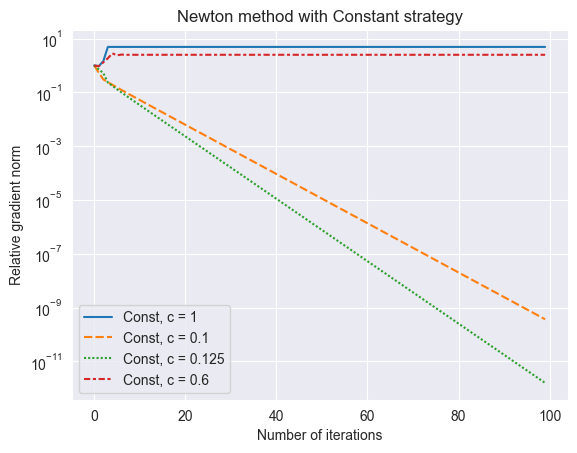

In [591]:
const = [1, 0.1, 0.125, 0.6]
result = Parallel(n_jobs=8)(
    delayed(check_constants_newton)(oracle_reg, x_0, 'Constant', 'c', x) for x in const)
result = pd.DataFrame(result)
result = result.T
result.columns = [f'Const, c = {x}' for x in const]
ax = sns.lineplot(data=result)
plt.yscale('log')
ax.set(xlabel='Number of iterations', ylabel='Relative gradient norm')
plt.title(r"Newton method with Constant strategy")